In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [130]:
mnist = pd.read_csv('./data/mnist_sample.csv')
mnist = mnist[(mnist['label'] == 0) | (mnist['label'] == 1)]
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
N = 28

y = mnist['label'].values
X = mnist.drop(columns=['label']).values

train_size = int(len(X) * 0.7)

X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('-'*30)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('-'*30)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X: (8816, 784)
Shape of y: (8816,)
------------------------------
Shape of X_train: (6171, 784)
Shape of y_train: (6171,)
------------------------------
Shape of X_test: (2645, 784)
Shape of y_test: (2645,)


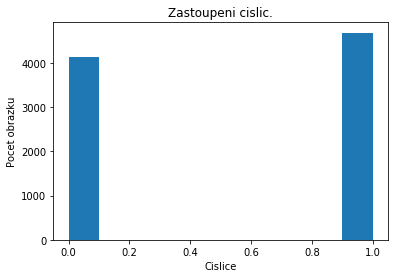

In [337]:
plt.title('Zastoupeni cislic.')
plt.hist(y)
plt.xlabel('Cislice')
plt.ylabel('Pocet obrazku')
plt.show()

In [338]:
def plot_image(index=None):
    if index is None:
        index = np.random.randint(low=0, high=len(y)-1)
    label = y[index]
    x = X[index, :]
    
    image = x.reshape((N, N))
    
    plt.imshow(image)
    plt.colorbar()
    plt.title('Label: {}'.format(label))
    plt.show()

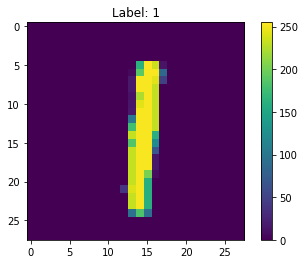

In [339]:
plot_image()

## Logistic regression

In [334]:
def gradient_descent(dfunc, lr, start_point=0, err=0.0001, max_iter=10000):

    it = 1
    diff = np.inf
    
    x_old = start_point
    x_new = None

    while (it < max_iter) and (err < diff):
        
        x_new = x_old - lr * dfunc(x_old)

        (x_new, x_old) = (x_old, x_new)

        it += 1
        diff = np.sum(abs(x_old - x_new))


    return x_new

# df = lambda x: 2*x - 1
# gradient_descent(dfunc=df, lr=0.01, start_point=0)

In [335]:
def logistic(weights, X):
    z = np.matmul(X, weights)
    return 1 / (1 + np.exp(-z))

In [326]:
def loss(weights, X=X_train, y=y_train):
    h = logistic(weights, X)
    return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

def loss_grad(weights, X=X_train, y=y_train):
    h = logistic(weights, X)
    return (1 / len(y)) * np.matmul((h - y), X)

In [309]:
grad = lambda w: loss_grad(weights=w, y=y_train, X=X_train)
w_opt = gradient_descent(dfunc=grad, lr=0.01, start_point=np.zeros(shape=X.shape[1]), max_iter=1000)

In [378]:
def predict(weights, X):
    return (logistic(weights, X_test) > 0.5).astype(int)

In [379]:
(y_test == predict(w_opt, X_test)).mean()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.998109640831758

## LR class

In [375]:
def gradient_descent(grad, lr, start_point=0, err=0.0001, max_iter=10000):

    it = 1
    diff = np.inf
    x_old = start_point
    x_new = None

    while (it < max_iter) and (err < diff):

        x_new = x_old - lr * grad(x_old)

        (x_new, x_old) = (x_old, x_new)
        it += 1
        diff = np.sum(abs(x_old - x_new))

    return x_new

class LogisticRegression:
    def __init__(self, lr=0.01):
        self.lr = lr
        
        self.weights = None
        
    def _logistic(self, weights, X):
        z = np.matmul(X, weights)
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, weights, X, y):
        h = self._logistic(weights, X)
        return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()

    def _loss_grad(self, weights, X, y):
        h = self._logistic(weights, X)
        return (1 / len(y)) * np.matmul((h - y), X)

    def fit(self, X, y, w0=None, max_iter=1000):
        
        if w0 is None:
            if self.weights is None:
                w0 = np.zeros(shape=X.shape[1])
            else:
                w0 = self.weights
        
        grad = lambda w: self._loss_grad(weights=w, y=y, X=X)
        w_opt = gradient_descent(grad=grad, lr=self.lr, start_point=w0, max_iter=max_iter)

        self.weights = w_opt
    
    def predict(self, X):
        if self.weights is None:
            raise Warning("Canr predict without training.")
        return (logistic(self.weights, X) > 0.5).astype(int)
    
    def accuracy(self, X, y):
        return (y == self.predict(X)).astype(int).mean()

In [376]:
lr = LogisticRegression(lr=0.1)
lr.fit(X_train, y_train,)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


In [377]:
acc_train = lr.accuracy(X_train, y_train)
acc_test = lr.accuracy(X_test, y_test)

print('Train accuracy: {:.1f} %'.format(acc_train*100))
print('Test accuracy: {:.1f} %'.format(acc_test*100))

Train accuracy: 100.0 %
Test accuracy: 99.8 %


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
